In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.core.common import SettingWithCopyWarning

In [2]:
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

In [3]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

In [4]:
RISKY_ASSET = "1810.HK"
MARKET_BENCHMARK = "^HSI"
START_DATE = '2019-01-01'
END_DATE = '2023-05-01'

In [5]:
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 progress=True)

print(f'Downloaded {df.shape[0]} rows of data.')

[*********************100%***********************]  2 of 2 completed
Downloaded 1065 rows of data.


In [6]:
list(df.columns.values)

[('Adj Close', '1810.HK'),
 ('Adj Close', '^HSI'),
 ('Close', '1810.HK'),
 ('Close', '^HSI'),
 ('High', '1810.HK'),
 ('High', '^HSI'),
 ('Low', '1810.HK'),
 ('Low', '^HSI'),
 ('Open', '1810.HK'),
 ('Open', '^HSI'),
 ('Volume', '1810.HK'),
 ('Volume', '^HSI')]

In [7]:
df.head()

Adj Close                 Close                  High  \
             1810.HK          ^HSI 1810.HK          ^HSI 1810.HK   
Date                                                               
2019-01-02     12.20  25130.349609   12.20  25130.349609   12.98   
2019-01-03     11.76  25064.359375   11.76  25064.359375   12.32   
2019-01-04     11.96  25626.029297   11.96  25626.029297   12.04   
2019-01-07     12.00  25835.699219   12.00  25835.699219   12.38   
2019-01-08     11.10  25875.449219   11.10  25875.449219   12.16   

                             Low                  Open                \
                    ^HSI 1810.HK          ^HSI 1810.HK          ^HSI   
Date                                                                   
2019-01-02  25824.439453   12.18  25055.269531   12.98  25824.439453   
2019-01-03  25262.210938   11.76  24896.869141   12.28  25077.679688   
2019-01-04  25626.029297   11.50  24924.730469   11.66  24946.119141   
2019-01-07  26043.640625   11.96  25753.460938   12.32  26015.839844   
2019-01-08  25960.890625   11.06  25688.500000   12.16  25852.500000   

              Volume              
             1810.HK        ^HSI  
Date                              
2019-01-02  32515761  1666316400  
2019-01-03  38910146  1481291700  
2019-01-04  25943844  1708572100  
2019-01-07  28376962  1447090300  
2019-01-08  91106400  1578205700

In [8]:
X = (
    df["Adj Close"]
    .rename(columns={RISKY_ASSET: "asset", 
                     MARKET_BENCHMARK: "market"})
    .resample("M")
    .last()
    .pct_change()
    .dropna()
)
X.head()

,asset,market
Date,,
2019-02-28,0.215447,0.024719
2019-03-31,-0.048495,0.014605
2019-04-30,0.056239,0.022297
2019-05-31,-0.202995,-0.094212
2019-06-30,0.043841,0.061021


In [9]:
X.cov()

,asset,market
asset,0.020621,0.005101
market,0.005101,0.004733


In [10]:
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance
beta

1.0777375400983675

In [11]:
# separate target
y = X.pop("asset")

# add constant
X = sm.add_constant(X)

# define and fit the regression model 
capm_model = sm.OLS(y, X).fit()

# print results 
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     17.81
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           0.000105
Time:                        09:43:07   Log-Likelihood:                 35.021
No. Observations:                  51   AIC:                            -66.04
Df Residuals:                      49   BIC:                            -62.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0162      0.017      0.928      0.3

In [13]:
print(capm_model.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &      asset       & \textbf{  R-squared:         } &     0.267   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.252   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     17.81   \\
\textbf{Date:}             & Wed, 05 Jul 2023 & \textbf{  Prob (F-statistic):} &  0.000105   \\
\textbf{Time:}             &     09:44:52     & \textbf{  Log-Likelihood:    } &    35.021   \\
\textbf{No. Observations:} &          51      & \textbf{  AIC:               } &    -66.04   \\
\textbf{Df Residuals:}     &          49      & \textbf{  BIC:               } &    -62.18   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \text

In [4]:
import pandas as pd
import yfinance as yf
#for multiple linear regression
import statsmodels.formula.api as smf
import pandas_datareader.data as web

In [8]:
RISKY_ASSET = "1810.HK"
START_DATE = "2019-01-01"
END_DATE = "2023-01-01"

In [10]:
ff_dict = web.DataReader("F-F_Research_Data_Factors", 
                         "famafrench", 
                         start=START_DATE,
                         end=END_DATE)

In [11]:
ff_dict.keys()

dict_keys([0, 1, 'DESCR'])

In [16]:
print(ff_dict['DESCR'])

F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202303 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2023 Kenneth R. French

  0 : (49 rows x 4 cols)
  1 : Annual Factors: January-December (4 rows x 4 cols)


In [17]:
ff_dict[0].head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2019-01,8.40,2.89,-0.46,0.21
2019-02,3.40,2.05,-2.67,0.18
2019-03,1.10,-3.03,-4.10,0.19
2019-04,3.97,-1.74,2.14,0.21
2019-05,-6.94,-1.31,-2.35,0.21


In [18]:
factor_3_df = ff_dict[0].rename(columns={"Mkt-RF": "MKT"}) \
                        .div(100)

factor_3_df.head()

,MKT,SMB,HML,RF
Date,,,,
2019-01,0.0840,0.0289,-0.0046,0.0021
2019-02,0.0340,0.0205,-0.0267,0.0018
2019-03,0.0110,-0.0303,-0.0410,0.0019
2019-04,0.0397,-0.0174,0.0214,0.0021
2019-05,-0.0694,-0.0131,-0.0235,0.0021


In [11]:
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       progress=False)

print(f"Downloaded {asset_df.shape[0]} rows of data.")

Downloaded 1065 rows of data.


In [12]:
y = asset_df["Adj Close"].resample("M") \
                         .last() \
                         .pct_change() \
                         .dropna()
y.index = y.index.to_period("m")
y.name = "rtn"
y.head()

Date
2019-02    0.215447
2019-03   -0.048495
2019-04    0.056239
2019-05   -0.202995
2019-06    0.043841
Freq: M, Name: rtn, dtype: float64

In [25]:
factor_3_df = factor_3_df.join(y)
factor_3_df["excess_rtn"] = (
    factor_3_df["rtn"] - factor_3_df["RF"]
)
factor_3_df.head()

,MKT,SMB,HML,RF,rtn,excess_rtn
Date,,,,,,
2019-01,0.0840,0.0289,-0.0046,0.0021,NaN,NaN
2019-02,0.0340,0.0205,-0.0267,0.0018,0.215447,0.213647
2019-03,0.0110,-0.0303,-0.0410,0.0019,-0.048495,-0.050395
2019-04,0.0397,-0.0174,0.0214,0.0021,0.056239,0.054139
2019-05,-0.0694,-0.0131,-0.0235,0.0021,-0.202995,-0.205095


In [30]:
# define and fit the regression model 
ff_model = smf.ols(formula="excess_rtn ~ MKT + SMB + HML", 
                   data=factor_3_df).fit()

# print results 
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     4.019
Date:                Sat, 27 May 2023   Prob (F-statistic):             0.0132
Time:                        17:26:25   Log-Likelihood:                 29.970
No. Observations:                  47   AIC:                            -51.94
Df Residuals:                      43   BIC:                            -44.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0025      0.020      0.126      0.9

In [31]:
ASSETS = ["1810.HK", "3690.HK", "6862.HK", "0388.HK", "1211.HK"]
WEIGHTS = [0.2, 0.2, 0.2, 0.2, 0.2]
START_DATE = "2019-01-01"
END_DATE = "2023-05-01"

In [32]:
factor_3_df = web.DataReader("F-F_Research_Data_Factors", 
                             "famafrench", 
                             start=START_DATE,
                             end=END_DATE)[0]
factor_3_df = factor_3_df.div(100)

In [9]:
asset_df = yf.download(ASSETS,
                       start=START_DATE,
                       end=END_DATE,
                       progress=False)

print(f"Downloaded {asset_df.shape[0]} rows of data.")

NameError: name 'ASSETS' is not defined

In [41]:
asset_df = asset_df["Adj Close"].resample("M") \
                                .last() \
                                .pct_change() \
                                .dropna()
# reformat index for joining
asset_df.index = asset_df.index.to_period("m")

In [45]:
import numpy as np

In [46]:
asset_df["portfolio_returns"] = np.matmul(
    asset_df[ASSETS].values, 
    WEIGHTS
)
asset_df.head()

,0388.HK,1211.HK,1810.HK,3690.HK,6862.HK,portfolio_returns
Date,,,,,,
2019-02,0.109016,0.090119,0.215447,0.142589,0.195534,0.150541
2019-03,0.022620,-0.057769,-0.048495,-0.131363,0.143508,-0.014300
2019-04,-0.005848,0.128964,0.056239,0.077505,0.203187,0.092009
2019-05,-0.083088,-0.140449,-0.202995,0.062281,-0.083658,-0.089582
2019-06,0.105854,0.032300,0.043841,0.131296,0.182971,0.099253


<AxesSubplot:xlabel='Date'>

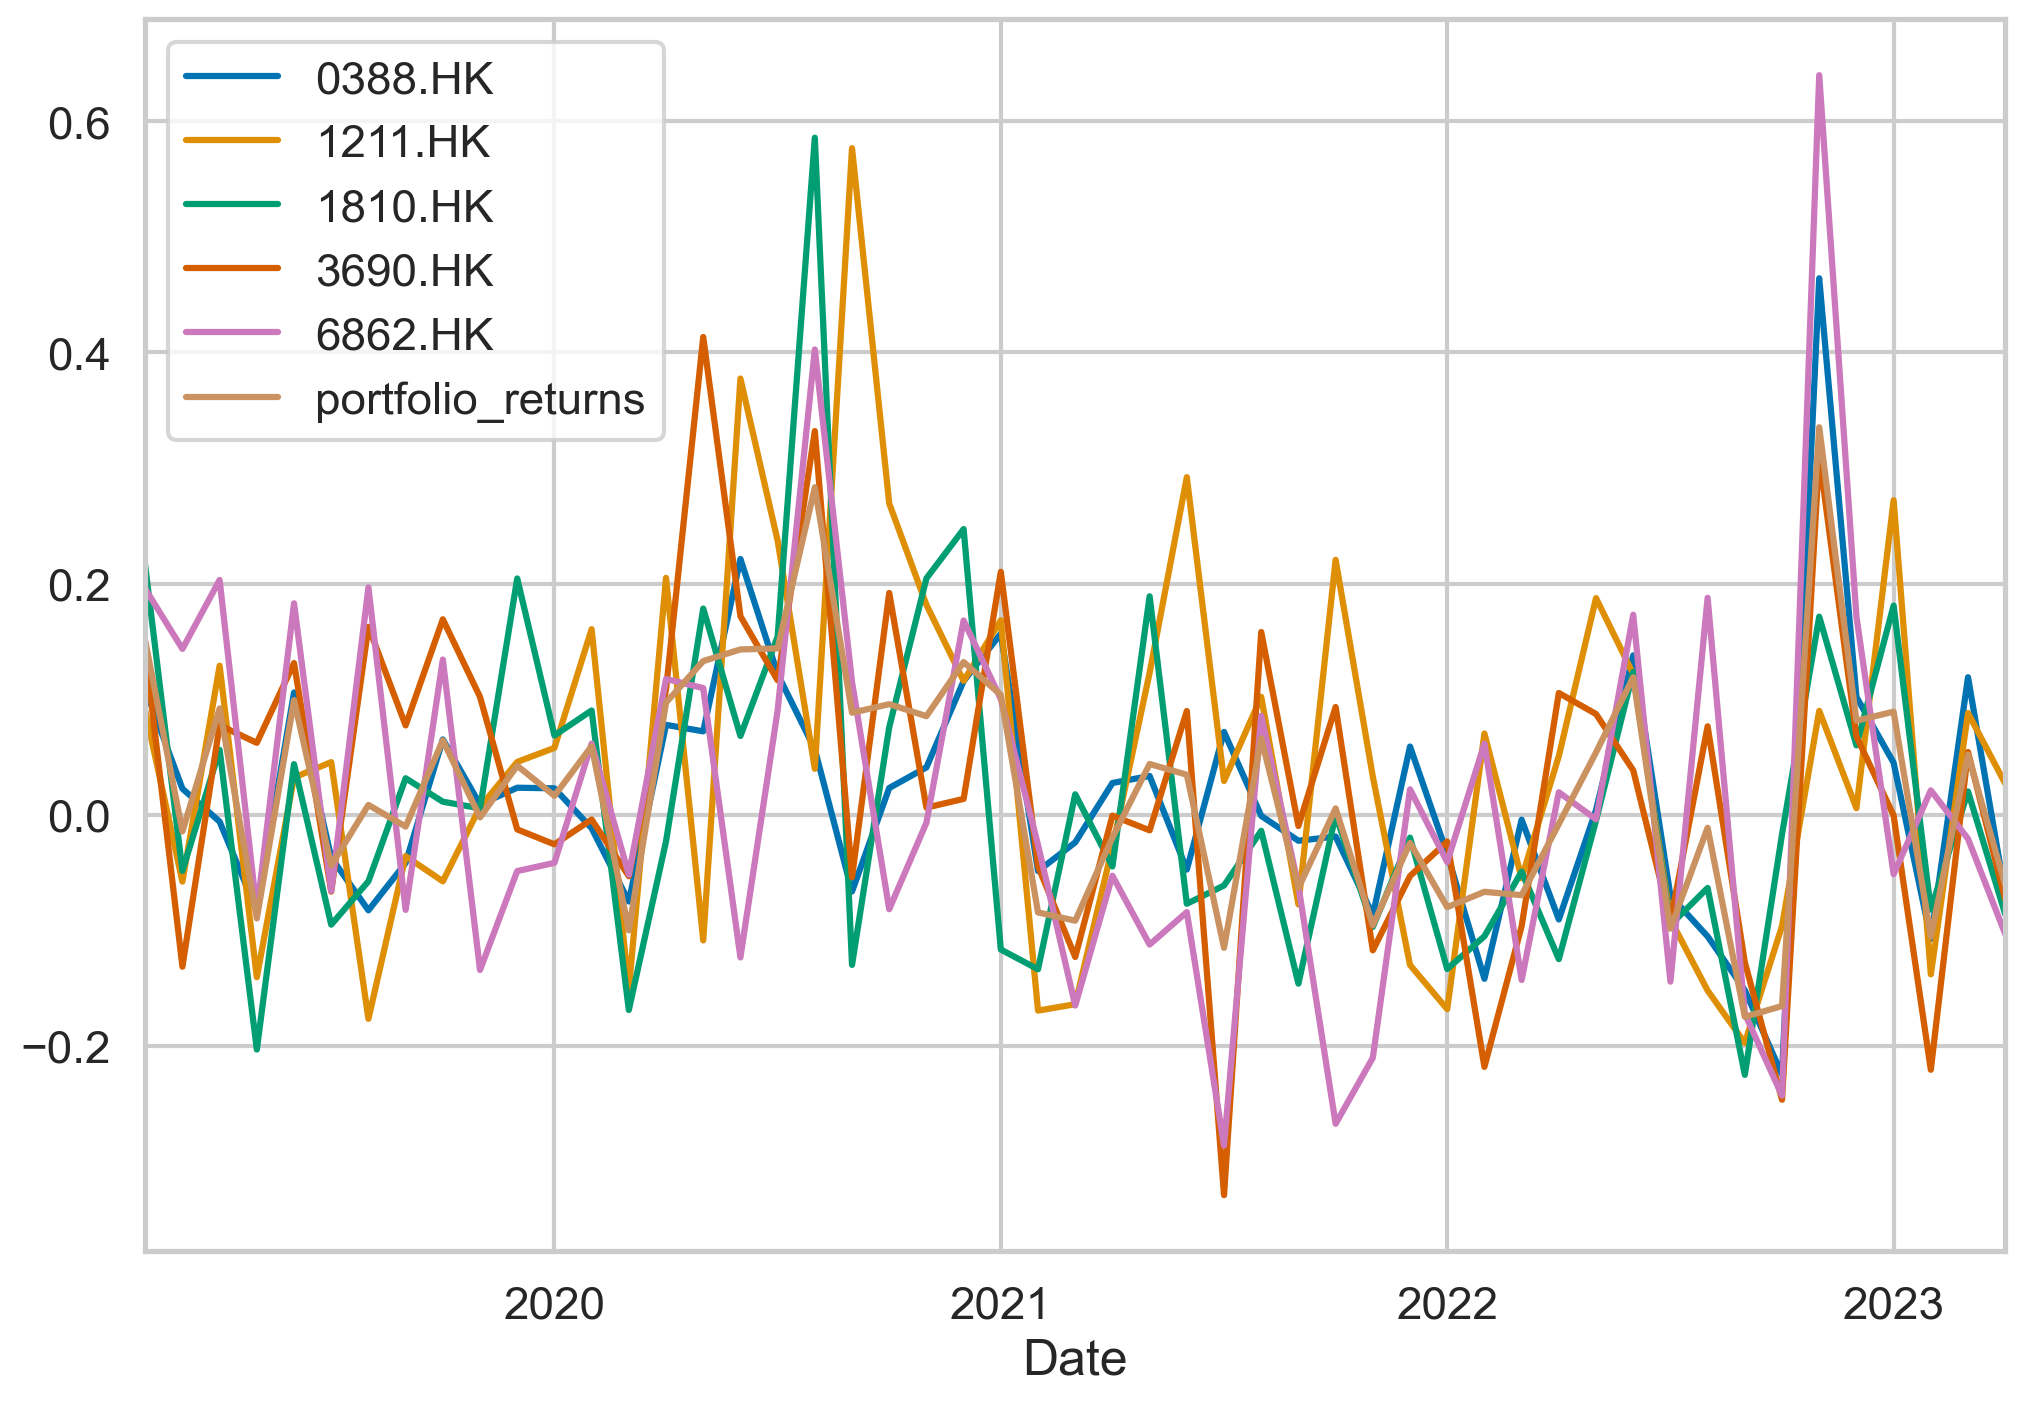

In [60]:
asset_df.plot()

In [50]:
#remove the column of the individual assets
factor_3_df = asset_df.join(factor_3_df).drop(ASSETS, axis=1)
factor_3_df.columns = ["portf_rtn", "mkt", "smb", "hml", "rf"]
factor_3_df["portf_ex_rtn"] = (
    factor_3_df["portf_rtn"] - factor_3_df["rf"]
)

In [51]:
def rolling_factor_model(input_data, formula, window_size):
    """
    Function for estimating the Fama-French (n-factor) model using a rolling window of fixed size.
    
    Parameters
    ------------
    input_data : pd.DataFrame
        A DataFrame containing the factors and asset/portfolio returns
    formula : str
        `statsmodels` compatible formula representing the OLS regression  
    window_size : int
        Rolling window length.
    
    Returns
    -----------
    coeffs_df : pd.DataFrame
        DataFrame containing the intercept and the three factors for each iteration.
    """

    coeffs = []

    for start_ind in range(len(input_data) - window_size + 1):        
        end_ind = start_ind + window_size

        # define and fit the regression model 
        ff_model = smf.ols(
            formula=formula, 
            data=input_data[start_ind:end_ind]
        ).fit()
   
        # store coefficients
        coeffs.append(ff_model.params)
    
    coeffs_df = pd.DataFrame(
        coeffs, 
        index=input_data.index[window_size - 1:]
    )

    return coeffs_df

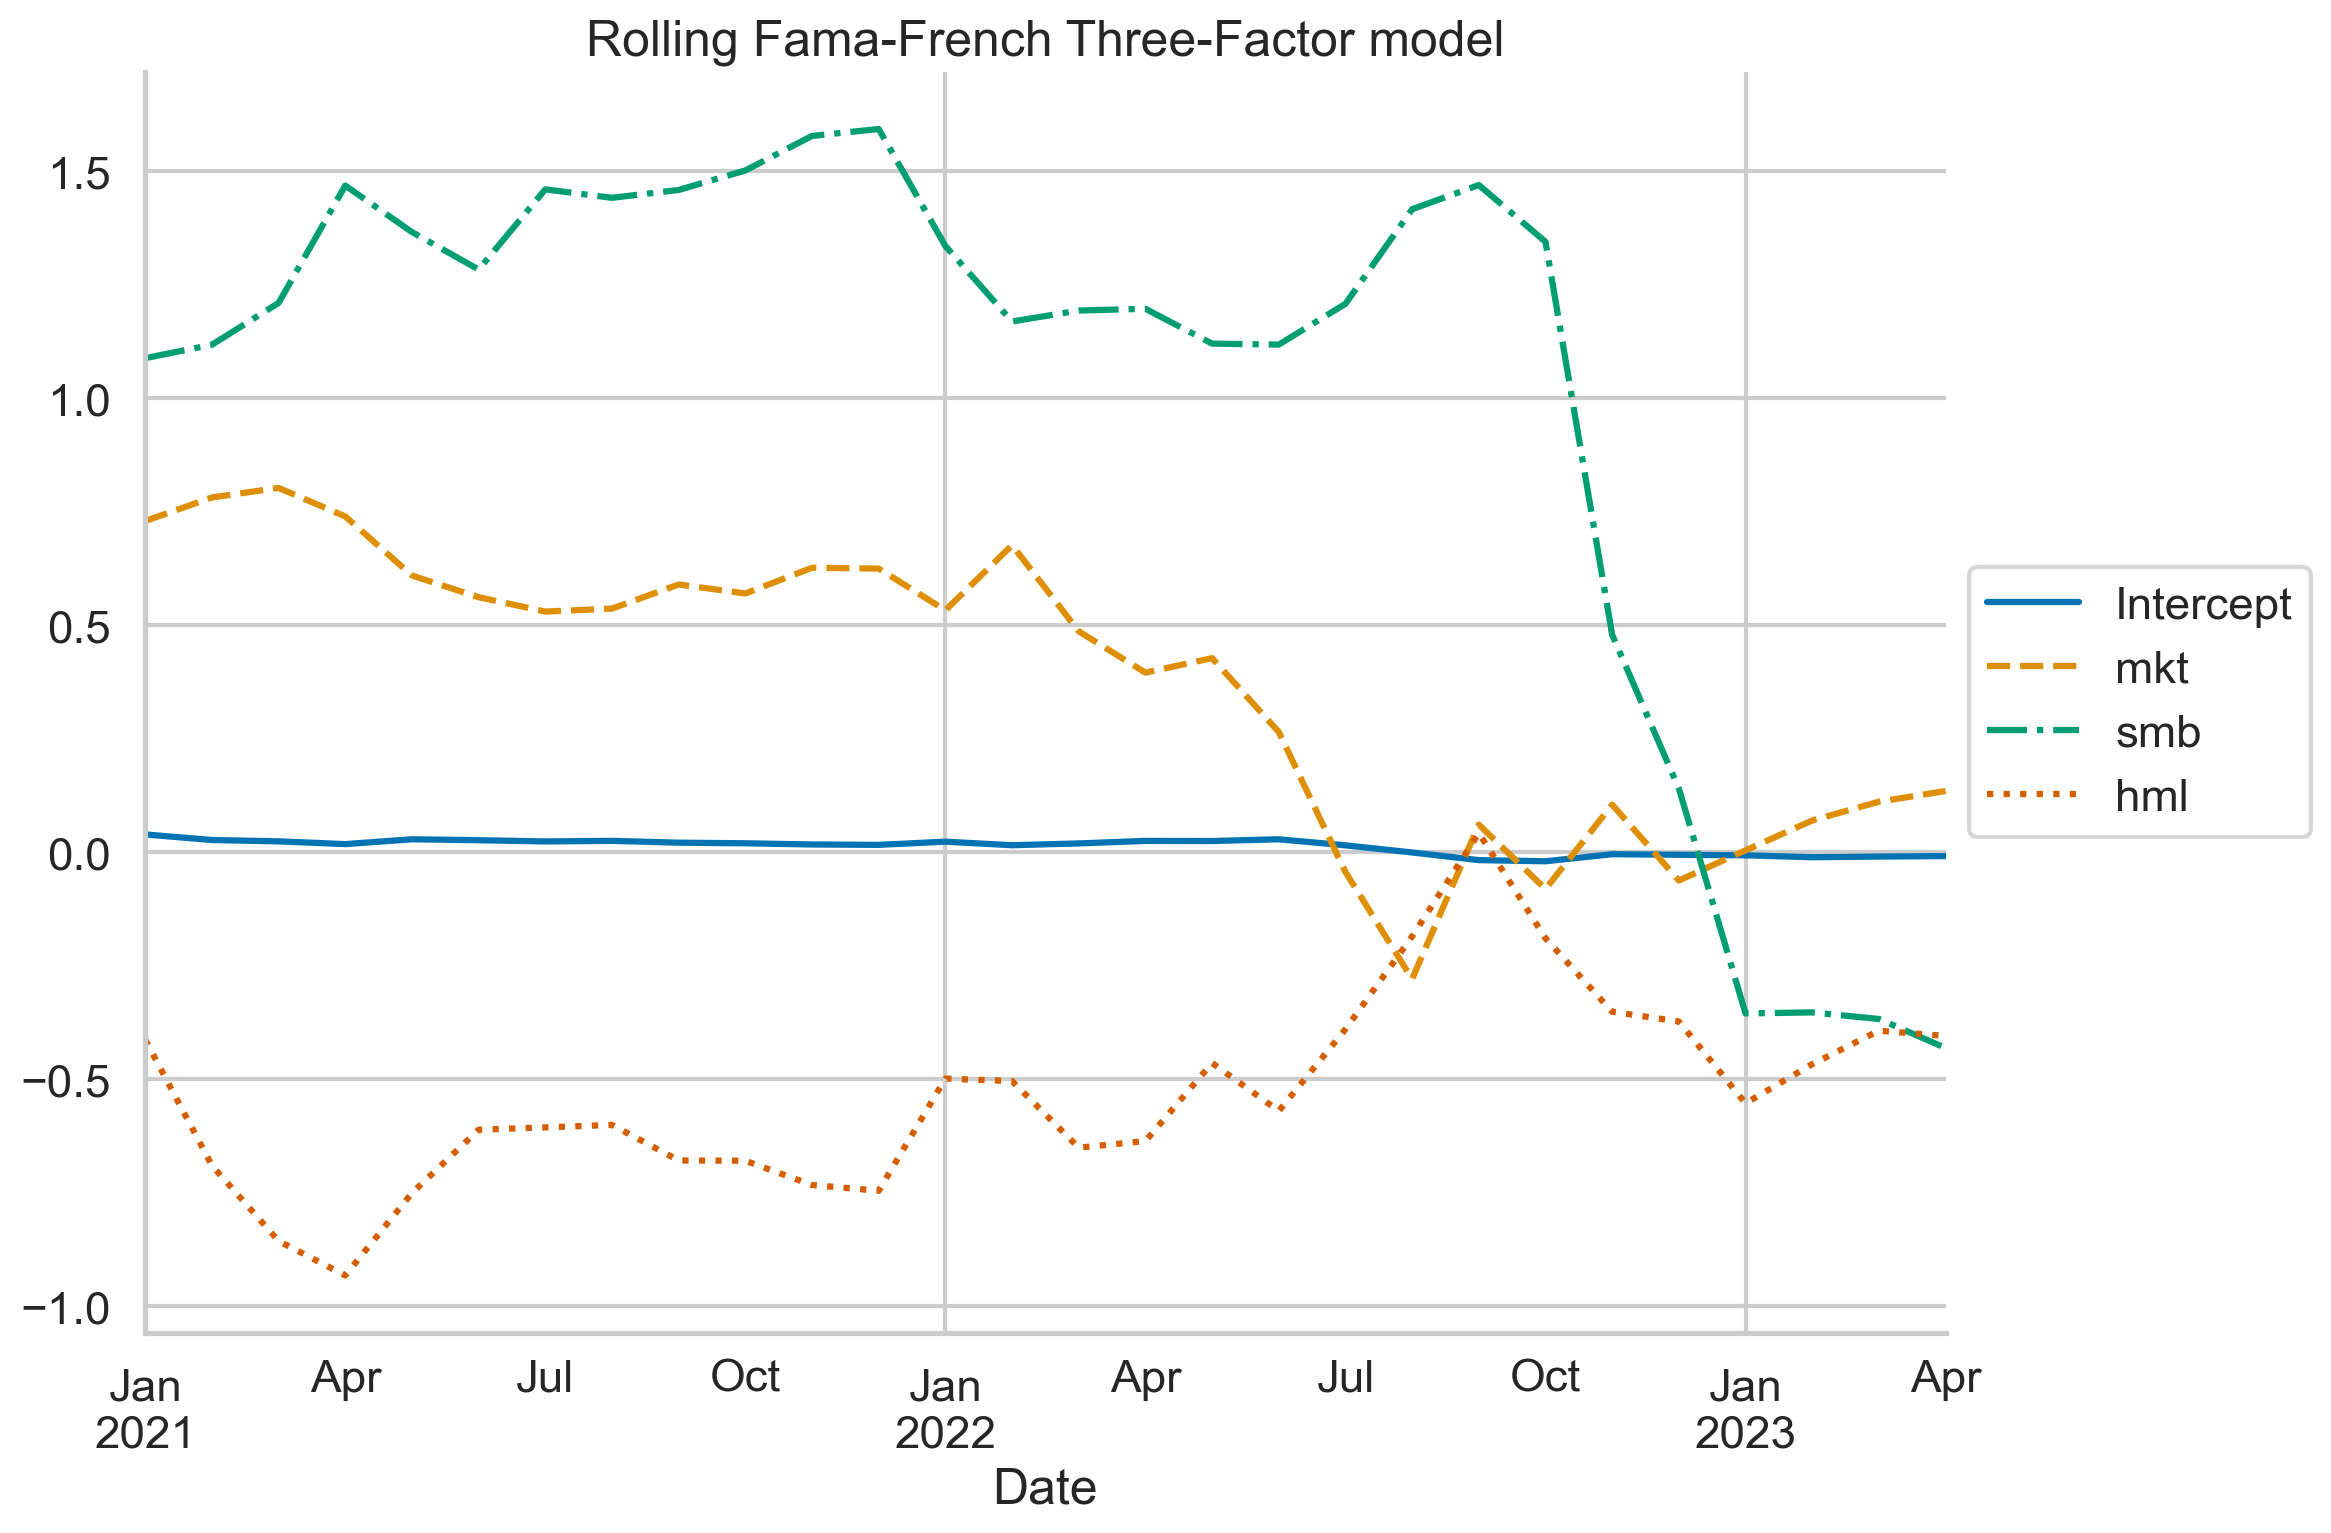

In [59]:
MODEL_FORMULA = "portf_ex_rtn ~ mkt + smb + hml"
results_df = rolling_factor_model(factor_3_df, 
                                  MODEL_FORMULA, 
                                  window_size=24)
(
    results_df
    .plot(title = "Rolling Fama-French Three-Factor model",
          style=["-", "--", "-.", ":"])
    .legend(loc="center left",bbox_to_anchor=(1.0, 0.5))
)

sns.despine()
plt.tight_layout()

5 factors

In [6]:
# five factors
factor_5_df = web.DataReader("F-F_Research_Data_5_Factors_2x3", 
                             "famafrench", 
                             start=START_DATE,
                             end=END_DATE)[0]

In [14]:
factor_5_df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2019-01,8.40,3.02,-0.46,-0.78,-1.51,0.21
2019-02,3.40,1.74,-2.67,0.12,-1.60,0.18
2019-03,1.10,-3.50,-4.10,0.90,-0.96,0.19
2019-04,3.97,-1.17,2.14,1.62,-2.20,0.21
2019-05,-6.94,-1.58,-2.35,-0.47,1.76,0.21


In [15]:
# join all datasets on the index
factor_5_df = factor_5_df.join(y)

# rename columns
factor_5_df.columns = [
    "mkt", "smb", "hml", "rmw", "cma", "rf", "rtn"
]

# divide everything (except returns) by 100
factor_5_df.loc[:, factor_5_df.columns != "rtn"] /= 100

# calculate excess returns
factor_5_df["excess_rtn"] = (
    factor_5_df["rtn"] - factor_5_df["rf"]
)

factor_5_df.head()

,mkt,smb,hml,rmw,cma,rf,rtn,excess_rtn
Date,,,,,,,,
2019-01,0.0840,0.0302,-0.0046,-0.0078,-0.0151,0.0021,NaN,NaN
2019-02,0.0340,0.0174,-0.0267,0.0012,-0.0160,0.0018,0.215447,0.213647
2019-03,0.0110,-0.0350,-0.0410,0.0090,-0.0096,0.0019,-0.048495,-0.050395
2019-04,0.0397,-0.0117,0.0214,0.0162,-0.0220,0.0021,0.056239,0.054139
2019-05,-0.0694,-0.0158,-0.0235,-0.0047,0.0176,0.0021,-0.202995,-0.205095


In [16]:
five_factor_model = smf.ols(
    formula="excess_rtn ~ mkt + smb + hml + rmw + cma", 
    data=factor_5_df
).fit()

print(five_factor_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     3.362
Date:                Mon, 29 May 2023   Prob (F-statistic):             0.0121
Time:                        09:30:31   Log-Likelihood:                 32.606
No. Observations:                  48   AIC:                            -53.21
Df Residuals:                      42   BIC:                            -41.98
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0039      0.020     -0.194      0.8

Fama-MacBeth regression

In [4]:
#Import the libraries
import pandas as pd
import pandas_datareader.data as web
from linearmodels.asset_pricing import LinearFactorModel

In [5]:
# pip install linearmodels

In [6]:
#Specify the time horizon
START_DATE = "2013-01"
END_DATE = "2023-05"

In [48]:
#Download and adjust the risk factors 
#.div(100) method call divides all values in the resulting DataFrame by 100
factor_5_df = (
    web.DataReader("F-F_Research_Data_5_Factors_2x3",
                   "famafrench",
                   start=START_DATE,
                   end=END_DATE)[0]
    .div(100)
)

In [8]:
factor_5_df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2013-01,0.0557,0.0047,0.0096,-0.0193,0.0142,0.0
2013-02,0.0129,-0.0025,0.0011,-0.0067,0.0054,0.0
2013-03,0.0403,0.0086,-0.0019,0.0014,0.0137,0.0
2013-04,0.0155,-0.0225,0.0045,0.0027,0.0037,0.0
2013-05,0.0280,0.0209,0.0263,-0.0197,-0.0091,0.0


In [57]:
# factor_5_df.head().round(3).to_latex(index=True, multicolumn_format='c')

In [10]:
#Download and adjust the returns of 12 Industry Portfolios
#Subtract the "RF" column from each row of the DataFrame
portfolio_df = (
    web.DataReader("12_Industry_Portfolios",
                   "famafrench",
                   start=START_DATE,
                   end=END_DATE)[0]
    .div(100)
    .sub(factor_5_df["RF"], axis=0)
)

In [11]:
portfolio_df.head()

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
2013-01,0.0510,0.0351,0.0563,0.0732,0.0675,0.0248,0.0491,0.0508,0.0558,0.0808,0.0632,0.0776
2013-02,0.0321,0.0001,0.0130,0.0069,0.0128,0.0057,0.0221,0.0216,0.0086,0.0135,0.0117,0.0238
2013-03,0.0502,0.0402,0.0318,0.0209,0.0160,0.0257,0.0573,0.0564,0.0469,0.0652,0.0456,0.0341
2013-04,0.0382,0.0363,-0.0023,-0.0135,0.0278,0.0050,0.0425,0.0505,0.0267,0.0258,0.0159,-0.0004
2013-05,-0.0229,0.0989,0.0455,0.0305,0.0130,0.0427,-0.0172,-0.0699,0.0224,0.0161,0.0722,0.0438


In [52]:
# portfolio_df.head().round(3).to_latex(index=True, multicolumn_format='c')

In [15]:
#Drop the risk-free rate column(=1) specified by its label "RF"
factor_5_df = factor_5_df.drop("RF", axis=1)

In [16]:
#Estimate the Fama-MacBeth regression and print the summary
five_factor_model = LinearFactorModel(
    portfolios=portfolio_df,
    factors=factor_5_df
)
result = five_factor_model.fit()
print(result)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 12   R-squared:                      0.7379
No. Factors:                          5   J-statistic:                    6.2591
No. Observations:                   124   P-value                         0.5098
Date:                  Mon, Jun 26 2023   Distribution:                  chi2(7)
Time:                          13:45:06                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         0.0106     0.0041     2.6031     0.0092      0.0026      0.0186
SMB           -0.0048     0.0050    

In [30]:
# print(result.full_summary)

In [31]:
#Import the libraries
from statsmodels.api import OLS, add_constant

In [32]:
#For the first step of the Fama-MacBeth regression, estimate the factor loadings:
factor_loadings = []
#endog and exog specifies the dependent and independent variables
for portfolio in portfolio_df:
    reg_1 = OLS(
        endog=portfolio_df.loc[:, portfolio],
        exog=add_constant(factor_5_df)
    ).fit()
    factor_loadings.append(reg_1.params.drop("const"))

In [33]:
for portfolio in portfolio_df:
    print(portfolio)

NoDur
Durbl
Manuf
Enrgy
Chems
BusEq
Telcm
Utils
Shops
Hlth 
Money
Other


In [34]:
type(portfolio_df)

pandas.core.frame.DataFrame

In [35]:
portfolio_df.loc[:, "NoDur"]

Date
2013-01    0.0510
2013-02    0.0321
2013-03    0.0502
2013-04    0.0382
2013-05   -0.0229
            ...  
2022-12   -0.0300
2023-01   -0.0063
2023-02   -0.0248
2023-03    0.0277
2023-04    0.0277
Freq: M, Name: NoDur, Length: 124, dtype: float64

In [36]:
reg_1 = OLS(
    endog=portfolio_df.loc[:, "NoDur"],
    exog=add_constant(factor_5_df)
).fit()

In [37]:
reg_1.params

const    -0.000986
Mkt-RF    0.729090
SMB      -0.193445
HML       0.023053
RMW       0.333724
CMA       0.326438
dtype: float64

In [38]:
type(factor_loadings)
factor_loadings[1]

Mkt-RF    1.541057
SMB       0.464974
HML      -0.207989
RMW      -0.243349
CMA      -0.457795
dtype: float64

In [39]:
#Store the factor loadings in a DataFrame
factor_load_df = pd.DataFrame(
    factor_loadings, 
    columns=factor_5_df.columns, 
    index=portfolio_df.columns
)
factor_load_df.head()

,Mkt-RF,SMB,HML,RMW,CMA
NoDur,0.729090,-0.193445,0.023053,0.333724,0.326438
Durbl,1.541057,0.464974,-0.207989,-0.243349,-0.457795
Manuf,1.049664,0.317693,0.187876,0.290700,-0.008546
Enrgy,1.286809,0.260226,0.961597,-0.544667,0.626254
Chems,0.828867,-0.000003,-0.043782,0.442418,0.319925


In [54]:
# factor_load_df.head().round(3).to_latex(index=True, multicolumn_format='c')

In [40]:
#For the second step of the Fama-MacBeth regression, estimate the risk premiums
risk_premia = []
for period in portfolio_df.index:
    reg_2 = OLS(
        endog=portfolio_df.loc[period, factor_load_df.index], 
        exog=factor_load_df
    ).fit()
    risk_premia.append(reg_2.params)

In [41]:
portfolio_df.index

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10',
             ...
             '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
             '2023-01', '2023-02', '2023-03', '2023-04'],
            dtype='period[M]', name='Date', length=124)

In [58]:
factor_load_df.index

Index(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'Chems', 'BusEq', 'Telcm', 'Utils',
       'Shops', 'Hlth ', 'Money', 'Other'],
      dtype='object')

In [59]:
# portfolio_df.head()

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
2013-01,0.0510,0.0351,0.0563,0.0732,0.0675,0.0248,0.0491,0.0508,0.0558,0.0808,0.0632,0.0776
2013-02,0.0321,0.0001,0.0130,0.0069,0.0128,0.0057,0.0221,0.0216,0.0086,0.0135,0.0117,0.0238
2013-03,0.0502,0.0402,0.0318,0.0209,0.0160,0.0257,0.0573,0.0564,0.0469,0.0652,0.0456,0.0341
2013-04,0.0382,0.0363,-0.0023,-0.0135,0.0278,0.0050,0.0425,0.0505,0.0267,0.0258,0.0159,-0.0004
2013-05,-0.0229,0.0989,0.0455,0.0305,0.0130,0.0427,-0.0172,-0.0699,0.0224,0.0161,0.0722,0.0438


In [61]:
portfolio_df.loc['2013-01', ]

NoDur    0.0510
Durbl    0.0351
Manuf    0.0563
Enrgy    0.0732
Chems    0.0675
BusEq    0.0248
Telcm    0.0491
Utils    0.0508
Shops    0.0558
Hlth     0.0808
Money    0.0632
Other    0.0776
Name: 2013-01, dtype: float64

In [43]:
# factor_load_df.head()

In [62]:
reg_2 = OLS(
        endog=portfolio_df.loc['2013-01', ], 
        exog=factor_load_df
    ).fit()
reg_2.params

Mkt-RF    0.051227
SMB      -0.012967
HML       0.012918
RMW       0.021961
CMA       0.040839
dtype: float64

In [44]:
len(risk_premia)

124

In [45]:
#Store the risk premiums in a DataFrame:
risk_premia_df = pd.DataFrame(
    risk_premia, 
    index=portfolio_df.index,
    columns=factor_load_df.columns.tolist())
risk_premia_df.head()

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2013-01,0.051227,-0.012967,0.012918,0.021961,0.040839
2013-02,0.013409,-0.027477,0.006037,0.015846,0.010647
2013-03,0.041799,-0.048041,-0.019516,-0.009674,0.019367
2013-04,0.022790,-0.038232,-0.024148,0.006584,0.010401
2013-05,0.027247,0.088813,0.000471,-0.019998,-0.063047


In [56]:
# risk_premia_df.head().round(3).to_latex(index=True, multicolumn_format='c')

In [46]:
factor_load_df.columns

Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], dtype='object')

In [47]:
#Calculate the average risk premiums
risk_premia_df.mean()

Mkt-RF    0.010635
SMB      -0.004791
HML      -0.003223
RMW       0.000269
CMA      -0.002224
dtype: float64